# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

##Observations


1. Temperature shows a distinct correlation with latitude, both in the Northern (-0.82) and Southern (0.77) hemispheres with a decrease in temperature as we move away from the equator.    


2. Wind speed appears to slightly increase as we move away from the equator.   


3. Both cloudiness (0.05-0.08) and humidity (0.07-0.08) appear to have little correlation to latitude.  

In [1]:
#Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from citipy import citipy

#Import API key
from api_keys import weather_api_key

#Cities File 
city_data = "data/cities.csv"

#Latitudes and Longitudes Range
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#Create Empty Lists lat_lngs and cities
lat_lngs = []
cities = []

#Create a Set of Random Lat and Lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Add City if unique, skip if not
    if city not in cities:
        cities.append(city)

#Print Cities
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create Lists
city_list = []
country_list = []
lats_list = []
lngs_list = []
date_list = []
temp_list = []
humidity_list = []
cloud_list = []
wind_speed_list = []

#Set Counter Values
index_counter = 0
set_counter = 1

In [4]:
#Print Start Message
print("Start")
print("-------------------------------")

#Set URL and API Key
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Begin For Loop 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        date_list.append(response["dt"])
        temp_list.append(response['main']['temp_max'])
        humidity_list.append(response["main"]["humidity"])
        cloud_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
    
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found.")

#Print End Message       
print("-------------------------------")
print("Complete")
print("-------------------------------")
        

Start
-------------------------------
Processing Record 1 of Set 1 : punta arenas
City not found.
City not found.
Processing Record 2 of Set 1 : bonthe
City not found.
Processing Record 3 of Set 1 : kapaa
Processing Record 4 of Set 1 : nanortalik
Processing Record 5 of Set 1 : naze
Processing Record 6 of Set 1 : half moon bay
Processing Record 7 of Set 1 : entre rios
Processing Record 8 of Set 1 : george
Processing Record 9 of Set 1 : namibe
Processing Record 10 of Set 1 : darhan
Processing Record 11 of Set 1 : ushuaia
Processing Record 12 of Set 1 : rikitea
Processing Record 13 of Set 1 : forio
Processing Record 14 of Set 1 : hermanus
Processing Record 15 of Set 1 : georgetown
Processing Record 16 of Set 1 : seydi
Processing Record 17 of Set 1 : cape town
Processing Record 18 of Set 1 : lata
Processing Record 19 of Set 1 : brawley
Processing Record 20 of Set 1 : pacific grove
Processing Record 21 of Set 1 : kailua
City not found.
Processing Record 22 of Set 1 : mehamn
Processing Recor

Processing Record 39 of Set 4 : kahului
Processing Record 40 of Set 4 : kodinsk
Processing Record 41 of Set 4 : nyurba
Processing Record 42 of Set 4 : kodiak
Processing Record 43 of Set 4 : lasa
Processing Record 44 of Set 4 : mecca
Processing Record 45 of Set 4 : hays
City not found.
Processing Record 46 of Set 4 : utiel
Processing Record 47 of Set 4 : skjervoy
Processing Record 48 of Set 4 : kudahuvadhoo
Processing Record 49 of Set 4 : rudbar
Processing Record 50 of Set 4 : tabou
Processing Record 0 of Set 5 : fortuna
Processing Record 1 of Set 5 : kondoa
Processing Record 2 of Set 5 : lebu
Processing Record 3 of Set 5 : portland
Processing Record 4 of Set 5 : inhambane
Processing Record 5 of Set 5 : raudeberg
Processing Record 6 of Set 5 : enterprise
Processing Record 7 of Set 5 : san policarpo
City not found.
Processing Record 8 of Set 5 : barrow
Processing Record 9 of Set 5 : tandil
Processing Record 10 of Set 5 : dauphin
Processing Record 11 of Set 5 : upernavik
Processing Record

Processing Record 29 of Set 8 : songkhla
Processing Record 30 of Set 8 : walvis bay
Processing Record 31 of Set 8 : honningsvag
Processing Record 32 of Set 8 : san luis
Processing Record 33 of Set 8 : kjopsvik
Processing Record 34 of Set 8 : umm kaddadah
Processing Record 35 of Set 8 : santa cruz del norte
Processing Record 36 of Set 8 : vigia del fuerte
Processing Record 37 of Set 8 : wagar
City not found.
Processing Record 38 of Set 8 : florence
Processing Record 39 of Set 8 : platteville
Processing Record 40 of Set 8 : katherine
Processing Record 41 of Set 8 : lazaro cardenas
Processing Record 42 of Set 8 : margate
Processing Record 43 of Set 8 : saint-denis
Processing Record 44 of Set 8 : mtsensk
Processing Record 45 of Set 8 : gaomi
Processing Record 46 of Set 8 : shitanjing
Processing Record 47 of Set 8 : pangnirtung
Processing Record 48 of Set 8 : juazeiro
Processing Record 49 of Set 8 : gravdal
Processing Record 50 of Set 8 : atambua
City not found.
Processing Record 0 of Set 9

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Convert Results into DataFrame
weather_data = pd.DataFrame({
    "City" : city_list,
    "Country" : country_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Date" : date_list, 
    "Max Temp" : temp_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list
})

In [6]:
#Display DataFrame
weather_data.head(10)

#Save DataFrame as CSV File
weather_data.to_csv("Data/City_Data.csv", encoding="utf-8")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Remove Cities with Humidity over 100%
clean_city_data = weather_data.loc[weather_data["Humidity"] <= 100]

#Display Results
clean_city_data.head(10)

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Clouds,Wind Speed
0,Punta Arenas,CL,-53.15,-70.92,1601716955,41.00,65,75,19.46
1,Bonthe,SL,7.53,-12.51,1601716956,78.48,86,99,3.06
2,Kapaa,US,22.08,-159.32,1601716957,80.60,83,75,4.70
3,Nanortalik,GL,60.14,-45.24,1601716958,37.04,91,97,12.97
4,Naze,JP,28.37,129.48,1601716959,80.60,69,20,11.41
5,Half Moon Bay,US,37.46,-122.43,1601716959,64.00,77,90,4.90
6,Entre Rios,BR,-11.94,-38.08,1601716960,68.05,93,16,1.45
7,George,ZA,-33.96,22.46,1601716960,60.80,93,75,18.34
8,Mossamedes,AO,-15.20,12.15,1601716961,66.20,82,75,13.87
9,Darhan,MN,49.49,105.92,1601716962,40.33,57,2,6.80


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

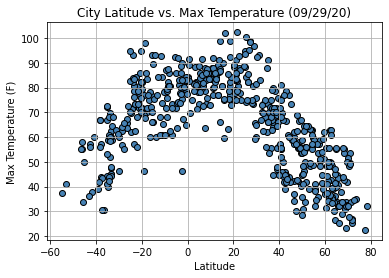

In [8]:
#Plot Latitude vs. Temperature Plot 
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (09/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save Scatter Plot as PNG
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

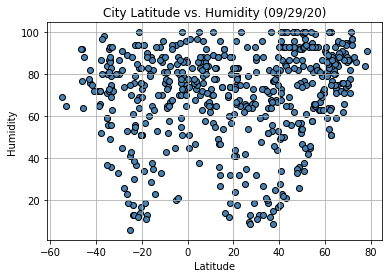

In [9]:
#Plot Latitude vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (09/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

#Save Scatter Plot as PNG
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

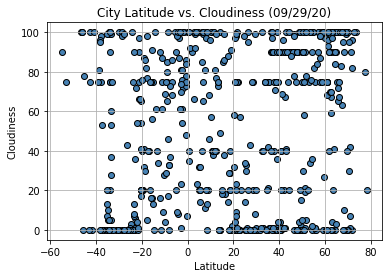

In [10]:
#Plot Latitude vs. Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (09/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

#Save Scatter Plot as PNG
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

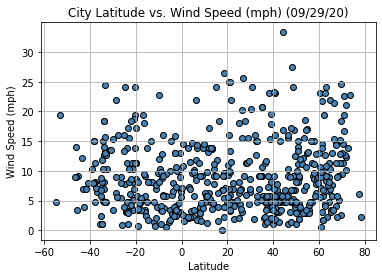

In [11]:
#PLot Latitude vs. Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (09/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#Save Scatter Plot as PNG
plt.savefig("Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [12]:
#Set Latitude for Northern Hemisphere
nothern_hemi = weather_data.loc[weather_data["Lat"] >= 0.0]
nothern_hemi.reset_index(inplace=True)

#Set Latitude for Southern Hemisphere
southern_hemi = weather_data.loc[weather_data["Lat"] < 0.0]
southern_hemi.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
#Calculate the Correlation Coefficient 
corr = round(st.pearsonr(nothern_hemi["Max Temp"],nothern_hemi["Lat"])[0],2)
print(f"The correlation between Max Temperature and Latitude is {corr}")

#Calculate the Linear Regression 
linear_regression = st.linregress(nothern_hemi["Max Temp"],nothern_hemi["Lat"])
print(linear_regression)

The correlation between Max Temperature and Latitude is -0.84
LinregressResult(slope=-0.8875483647831038, intercept=94.64796002506182, rvalue=-0.8355044088971001, pvalue=9.99194180959392e-98, stderr=0.030428056921460903)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
#Calculate the Correlation Coefficient 
corr = round(st.pearsonr(southern_hemi["Max Temp"],southern_hemi["Lat"])[0],2)
print(f"The correlation between Max Temperature and Latitude is {corr}")  

#Calculate the Linear Regression 
linear_regression = st.linregress(southern_hemi["Max Temp"],southern_hemi["Lat"])
print(linear_regression)

The correlation between Max Temperature and Latitude is 0.67
LinregressResult(slope=0.5936416229609454, intercept=-61.965875489693346, rvalue=0.6701075543453408, pvalue=9.820261685307e-26, stderr=0.048345089786198746)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [15]:
#Calculate the Correlation Coefficient 
corr = round(st.pearsonr(nothern_hemi["Humidity"],nothern_hemi["Lat"])[0],2)
print(f"The correlation between Humidity and Latitude is {corr}")

#Calculate the Linear Regression 
linear_regression = st.linregress(nothern_hemi["Humidity"],nothern_hemi["Lat"])
print(linear_regression)

The correlation between Humidity and Latitude is 0.21
LinregressResult(slope=0.19891026154958258, intercept=25.01164031463744, rvalue=0.21465247855003833, pvalue=3.132907030807291e-05, stderr=0.04717960826915302)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [16]:
#Calculate the Correlation Coefficient 
corr = round(st.pearsonr(southern_hemi["Humidity"],southern_hemi["Lat"])[0],2)
print(f"The correlation between Humidity and Latitude is {corr}")

#Calculate the Linear Regression  
linear_regression = st.linregress(southern_hemi["Humidity"],southern_hemi["Lat"])
print(linear_regression)

The correlation between Humidity and Latitude is -0.0
LinregressResult(slope=-0.0004392602840918227, intercept=-20.963274737428538, rvalue=-0.0007592962128503099, pvalue=0.9917710837710232, stderr=0.042532872574405)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [17]:
#Calculate the Correlation Coefficient 
corr = round(st.pearsonr(nothern_hemi["Clouds"],nothern_hemi["Lat"])[0],2)
print(f"The correlation between Cloudiness and Latitude is {corr}")

#Calculate the Linear Regression 
linear_regression = st.linregress(nothern_hemi["Clouds"],nothern_hemi["Lat"])
print(linear_regression)

The correlation between Cloudiness and Latitude is 0.13
LinregressResult(slope=0.0656310215788994, intercept=35.63864349886172, rvalue=0.12753459257632146, pvalue=0.014092043033416215, stderr=0.026607024012448754)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [18]:
#Calculate the Correlation Coefficient 
corr = round(st.pearsonr(southern_hemi["Clouds"],southern_hemi["Lat"])[0],2)
print(f"The correlation between Cloudiness and Latitude is {corr}")

#Calculate the Linear Regression  
linear_regression = st.linregress(southern_hemi["Clouds"],southern_hemi["Lat"])
print(linear_regression)

The correlation between Cloudiness and Latitude is 0.12
LinregressResult(slope=0.04173002286443004, intercept=-23.024876246955273, rvalue=0.12117479359850133, pvalue=0.09852988555016992, stderr=0.025132655882656074)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [19]:
#Calculate the Correlation Coefficient 
corr = round(st.pearsonr(nothern_hemi["Wind Speed"],nothern_hemi["Lat"])[0],2)
print(f"The correlation between Wind Speed (mph) and Latitude is {corr}")

#Calculate the Linear Regression  
linear_regression = st.linregress(nothern_hemi["Wind Speed"],nothern_hemi["Lat"])
print(linear_regression)

The correlation between Wind Speed (mph) and Latitude is 0.12
LinregressResult(slope=0.39955684451013584, intercept=35.51488951372573, rvalue=0.11755437442874035, pvalue=0.02373459032375156, stderr=0.17595198849225077)


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [20]:
#Calculate the Correlation Coefficient 
corr = round(st.pearsonr(southern_hemi["Wind Speed"],southern_hemi["Lat"])[0],2)
print(f"The correlation between Wind Speed (mph) and Latitude is {corr}")

#Calculate the Linear Regression 
linear_regression = st.linregress(southern_hemi["Wind Speed"],southern_hemi["Lat"])
print(linear_regression)

The correlation between Wind Speed (mph) and Latitude is -0.19
LinregressResult(slope=-0.46338826764010943, intercept=-17.04428624465312, rvalue=-0.18966783361248887, pvalue=0.009324527720985784, stderr=0.17636397753472427)
